# <center> Customer Segmentation and Profiling </center>
<center> using </center>
<center> RFM analysis and Clustering </center>
<center> ************************************************************************************ </center>

## What is Customer Segmentation?
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.
A company might segment customers according to a wide range of factors, including but not limited to:
* Customer Demographics
* **Transaction history**
* Location

## Why Segment Customers?
Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. Specifically, segmentation helps a company:

* **Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment. **
* ** Identify ways to improve products or new product or service opportunities. **
* Establish better customer relationships.
* ** Test pricing options.**
* **Upsell and cross-sell other products and services. **

## How to Segment Customers?
Customer segmentation requires a company to gather specific information about customers and analyze it to identify patterns that can be used to create segments.

Some of that can be gathered from the customers purchasing information such as Date of Purchase, geography, products purchased, etc. Some of it might be gleaned from how the customer entered your system. An online marketer working from an opt-in email list might segment marketing messages according to the opt-in offer that attracted the customer, Other information, however, including consumer demographics such as age and marital status, will need to be acquired in other ways.


### For my analysis I have used techinque called RFM analysis and clustering algorithm, where:
#### **R - Recency**: Recency is how recently for the date of analysis did the customer make a purchase. Customers who have purchased recently are more likely to purchase again when compared to those who did not purchase recently.
####  **F - Frequency**: Frequency is how often did the customer made purchases. The higher the frequency, the higher is the chances of these responding to the offers.
#### **M - Monetary**: Monetary is the total revenue generated by the customer through thier purchases. Customers who have spent higher contribute more value to the business as compared to those who have spent less
#### **Clustering**: Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).


# Data:
The data for our analysis is a transnational data which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online retail company.

### Source:
UCI's Machine Learning Repository uploaded by Dr Daqing Chen.
* link: http://archive.ics.uci.edu/ml/machine-learning-databases/00352/

### Attribute Information:

* InvoiceNo: 6-digit integer number uniquely assigned to each transaction. letter ‘c’ at the start of InvoiceNo indicates a cancellation.
* StockCode: 5-digit integer number uniquely assigned to each distinct product.
* Description: Product name
* Quantity: The quantities of each product (item) per transaction.
* InvoiceDate: The day and time when each transaction was generated. 
* UnitPrice: Product price per unit in £ sterling.
* CustomerID:  5-digit integer number uniquely assigned to each customer.
* Country: The name of the country where each customer resides.





In [1]:
# importing all the packages required for the data analysis
import pandas as pd ## for feautre engineering
import numpy as np  ## for feautre engineering
import matplotlib as mpl ## for plot
import matplotlib.pyplot as plt ## for plot
import seaborn as sns  ## for plot
import datetime, nltk, warnings 
import matplotlib.cm as cm
from sklearn.decomposition import NMF
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
import lda
from sklearn.decomposition import SparsePCA 
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import plotly.graph_objs as go
color = sns.color_palette()
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
# read the datafile

# loading the dataset: 
df_initial = pd.read_excel('/Users/deepanshparab/Downloads/Online Retail.xlsx', encoding="ISO-8859-1",
                          dtype={'InvoiceID': str})
                        
display(df_initial.shape)

# Top 10 observations of our data:
display(df_initial.head(10))

(541909, 8)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
# Checking the stastics of the dataset
display(df_initial.describe())

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Finding the missing values in the observations

In [3]:
#____________________________________________________________
# converting invoiceDate to datetime
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate']) 

#____________________________________________________________
# some info on columns types and find number of columns with null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))

# displaying the observations with missing values and thier percentage count
display(tab_info)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,1454,0,0,0,135080,0
null values (%),0,0,0.268311,0,0,0,24.9267,0


While looking at the number of null values in the dataframe, it is interesting to note that **24.92%** of the observations are not assigned to any particular customer. With such data , it is impossible to impute values for the customers and such entries do not contribute any value for our analysis. So I dropped them from the dataframe.





In [4]:
df_initial.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df_initial.shape)

#____________________________________________________________
# checking to see if we have removed all observations with missing values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
# checking the dataset status after dropping the missing values
display(tab_info)

Dataframe dimensions: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
column type,object,object,object,int64,datetime64[ns],float64,float64,object
null values (nb),0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0


After removing the observations with missing values, we are left with 
**406,829** observations.

## Finding the Duplicate values in the observations

In [5]:
print('Duplicate Entries: {}'.format(df_initial.duplicated().sum()))
df_initial[(df_initial.InvoiceNo == 536412) & (df_initial.StockCode == 21448) & (df_initial.Quantity == 2) ]

Duplicate Entries: 5225


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
565,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
601,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
604,536412,21448,12 DAISY PEGS IN WOOD BOX,2,2010-12-01 11:49:00,1.65,17920.0,United Kingdom


In [6]:
# dropping values with duplicate entries
df_initial.drop_duplicates(inplace = True) 

df_initial.shape

(401604, 8)

After removing the **5,225** duplicate observations from the dataset, we are left with **401,604** observations.

# Exploring Individual Features:

## 1. Country

In [7]:
temp = df_initial[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('The Online Retail Company covers : {} countries'.format(len(countries)))

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':' Number of Orders'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'Mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

The Online Retail Company covers : 37 countries


The Online retail store has customer base in **37** countries covering major countries in **Europe**.
Also to note that being a **UK based company**, the dataset is largely dominated by customers ordering from UK.
It can be seen that UK contributes to around 90% of the customer base and transaction, so I am narrowing down my analysis to customers based in UK.
* **Note: A seperate analysis can be done on customers out-side UK**

In [8]:
df_uk = df_initial[df_initial.Country == 'United Kingdom']
df_uk.shape

(356728, 8)

Now we are left with 356,728 observations for customers based in UK

## Number of Unique Customers and products and Transactions

In [9]:
print(pd.DataFrame([{'products': len(df_uk['StockCode'].value_counts()),    
               'transactions': len(df_uk['InvoiceNo'].value_counts()),
               'customers': len(df_uk['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity']))

          products  transactions  customers
quantity      3661         19857       3950


The dataset contains:
* **3,661** products 
* purchased by **3,950** customers 
* spread over **19,857** transactions

## 2. Invoice Number 

In [10]:
temp = df_uk.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:4].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12346.0,C541433,1
2,12747.0,537215,7
3,12747.0,538537,8


The first lines of this list shows several things worthy of interest:
- the existence of entries with the prefix **C** for the **InvoiceNo** variable: this indicates transactions that have been canceled
- the existence of users who only came once and only purchased one product (e.g. **CustomerID: 12346**) and then cancelled/ returned that product, this customers are not contributing to the companies revenue coz they are returning the products that they have previously purchased
- Seperate analysis can be done on undertand why customers cancelled their orders.

### Cancelled / Returned transcations:



In [11]:
# counting all the invoiceNo that has a C present in it
nb_products_per_basket['order_canceled'] = nb_products_per_basket['InvoiceNo'].apply(lambda x: int('C' in str(x)))
display(nb_products_per_basket[:5])
#______________________________________________________________________________________________
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of canceled orders: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346.0,541431,1,0
1,12346.0,C541433,1,1
2,12747.0,537215,7,0
3,12747.0,538537,8,0
4,12747.0,541677,5,0


Number of canceled orders: 3208/19857 (16.16%) 


The dataset contains **3,208** transactions that were cancelled owing to **16.16%** of the total **19,857** transactions made.

## 3. Quantity

In [12]:
display(df_uk.sort_values('CustomerID')[:2])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom


It can be observed form the above observations that for a cancelled transaction: 
- There is another transactions in the dataframe, mostly identical except for the **Negative value for Quantity** with different InvoiceNo and InvoiceDate.
    - I wanted to check if the negative value for Quantity is only owing to cancelled transcations or there are other reasons for cancelled transactions.
    - Are the customers returning back the entire quantity of products or just a part of the products



In [13]:
df_check = df_uk[df_uk['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if df_uk[(df_uk['CustomerID'] == col[0]) & (df_uk['Quantity'] == -col[1]) 
                & (df_uk['Description'] == col[3])].shape[0] == 0: 
        print(df_check.loc[index])
        display(15*'-'+'>'+' Discounted Products also contribute to Negative Quantity')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object


'---------------> Discounted Products also contribute to Negative Quantity'

For my next analysis I excluded the Discounted observations and checked again:

In [14]:
df_check = df_uk[(df_uk['Quantity'] < 0) & (df_uk['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  df_check.iterrows():
    if df_uk[(df_uk['CustomerID'] == col[0]) & (df_uk['Quantity'] == -col[1]) 
                & (df_uk['Description'] == col[3])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(20*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
--------------------> HYPOTHESIS NOT FULFILLED


Once more, we find that our initial hypothesis was not verified. 
- Hence, cancellations do not necessarily correspond to orders that would have been made beforehand.
- This might be the orders that we placed before Dec, 2010 i.e the start date of our analysis
- At this point, I decided to create a new variable **`QuantityCanceled`** in the dataframe that indicates if part of the ORDER has been canceled. 
- I collected the cancelled orders placed before dec, 2010 in a seperate list and excluded it form out analysis.


      

In [15]:
df_cleaned = df_uk.copy()

In [16]:
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] 
entry_before_dec2010 = []

for index, col in  df_uk.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_uk[(df_uk['CustomerID'] == col['CustomerID']) &
                         (df_uk['StockCode']  == col['StockCode']) & 
                         (df_uk['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_uk['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        entry_before_dec2010.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break   

In [17]:
# df_cleaned_copy = df_cleaned
df_cleaned[(df_cleaned.CustomerID == 17315) & (df_cleaned.Description == '36 PENCILS TUBE RED RETROSPOT')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
433318,573911,20979,36 PENCILS TUBE RED RETROSPOT,6,2011-11-01 15:40:00,1.25,17315.0,United Kingdom,5
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,0


In [18]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(entry_before_dec2010, axis = 0, inplace = True)

## 4. Stock Code

It has been seen that some values of the ** StockCode ** variable indicate a particular transaction (i.e. D for _Discount_). I checked the contents of this variable by looking for the set of codes that would contain only letters:

In [29]:
# list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
# list_special_codes

In [65]:
for code in list_special_codes:
    print("{:<15} -> {:<30}".format(code, df_cleaned[df_cleaned['StockCode'] == code]['Description'].unique()[0]))

D               -> Discount                      
M               -> Manual                        
BANK CHARGES    -> Bank Charges                  
POST            -> POSTAGE                       
C2              -> CARRIAGE                      
PADS            -> PADS TO MATCH ALL CUSHIONS    
DOT             -> DOTCOM POSTAGE                
CRUK            -> CRUK Commission               


## 5. Description

In [19]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, coloumn = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[coloumn]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("No. of keywords in variable '{}': {}".format(coloumn,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

#Extracting unique product descriptions 
df_products = pd.DataFrame(df_uk['Description'].unique()).rename(columns = {0:'Description'})

# calling the above created function
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)


No. of keywords in variable 'Description': 1480


The execution of this function returns three variables:

- **keywords**: the list of extracted keywords
- **keywords_roots**: a dictionary where the keys are the keywords roots and the values are the lists of words associated with those roots
- **keywords_select**: a dictionay of the orginal word and the stemmed word
- **count_keywords**: dictionary listing the number of times every word is used

Lisitng the top-50 words apperaing in most of the descriptions:

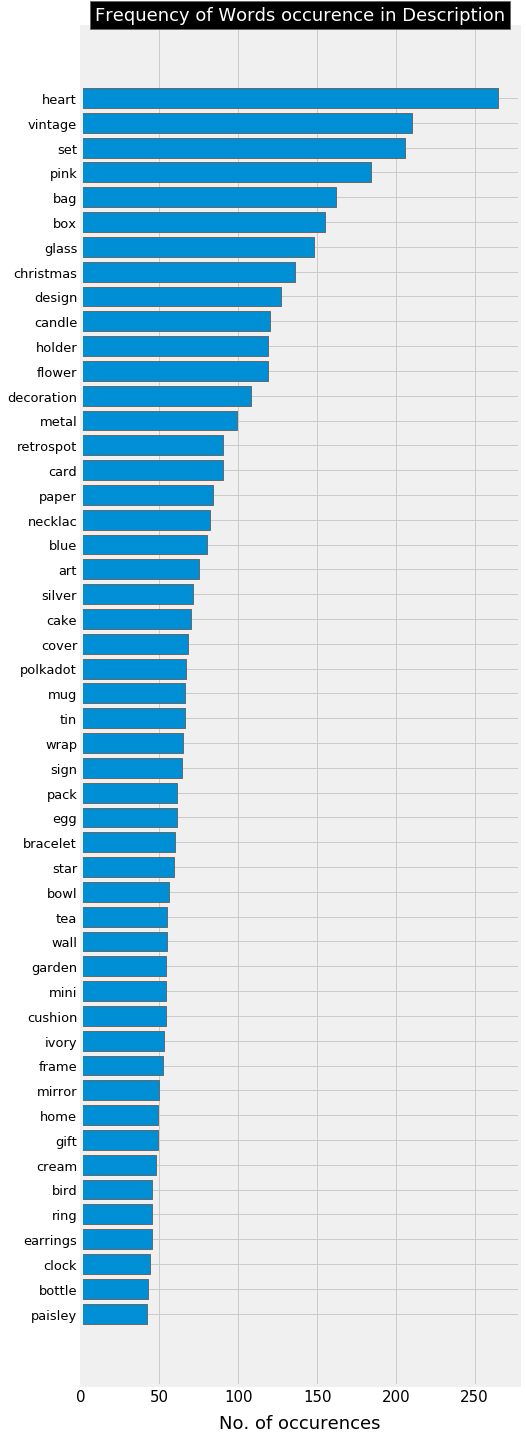

In [20]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)
lists = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in lists[:50]]
x_axis = [k for k,i in enumerate(lists[:50])]
x_label = [i[0] for i in lists[:50]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("No. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Frequency of Words occurence in Description",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 18)
plt.show()

## 6. Exploring the Basket Price:

**Basket Price** is the of revenue generated by the products purchased by the customer per transaction.
Each entry in the dataframe indicates prizes for a single kind of product purchased by the user. Hence, orders are split on several lines.

To calculate the basket price I first created a new column `Revenue` which is the amount of revenue generate by the customer from each product they purchased.
* Formula: (Quantity purchased - Quantity canceled) * Unit Price



In [21]:
df_cleaned['Revenue'] = (df_cleaned.Quantity - df_cleaned.QuantityCanceled)* df_cleaned.UnitPrice
df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,0,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,0,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,0,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,0,54.08


(16538, 4)

,CustomerID,InvoiceNo,Basket_Price,InvoiceDate
10,12747.0,577104,312.73,2011-11-17 17:13:00
9,12747.0,569397,675.38,2011-10-04 08:26:00
8,12747.0,563949,301.70,2011-08-22 10:38:00
7,12747.0,558265,376.30,2011-06-28 10:06:00


purchase count of observation in each price_range: [1067, 977, 3766, 7416, 2372, 863, 68]


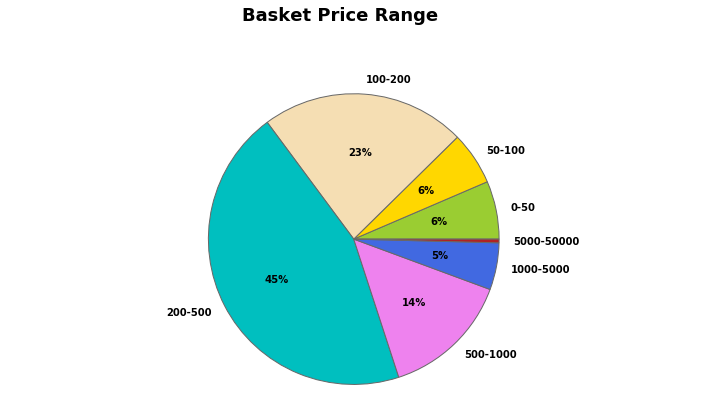

In [22]:
#___________________________________________ 
# Renamed the Revenue column as Basket_Price
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
basket_price = temp.rename(columns = {'Revenue':'Basket_Price'})


#_____________________
# Order Date
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price.head()


#______________________________________
# selecting entities generating positive revenue  :
basket_price = basket_price[basket_price['Basket_Price'] > 0]

display(basket_price.shape)
display(basket_price.sort_values('CustomerID')[1:5])

#____________________
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket_Price'] < price) &
                       (basket_price['Basket_Price'] > price_range[i-1])]['Basket_Price'].count()
    count_price.append(val)

print('purchase count of observation in each price_range: {}'.format(count_price))
#____________________________________________
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}-{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Basket Price Range", ha='center', fontsize = 18);

It can be seen that the vast majority of orders concern relatively large purchases given that **66.1%** of purchases generate revenue in excess of **£200**.

# Feature Engineering:


##  1. Generating Categories for Products:

In [23]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)

listz_products = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), listz_products))



#### One-hot data encoding

Now I will use these keywords to create groups of product. Firstly, I define the matrix $X$ as:
    
   
|   | word 1  |  ...  | word j  | ...  | word N  |
|:-:|---|---|---|---|---|
| Product Description  | $a_{1,1}$  |     |   |   | $a_{1,N}$  |
| ...        |            |     | ...  |   |   |
|product Description i   |    ...     |     | $a_{i,j}$    |   | ...  |
|...         |            |     |  ... |   |   |
| product M  | $a_{M,1}$  |     |   |   | $a_{M,N}$   |

- where the $a_ {i, j}$ coefficient  is 1 if the description of the product $i$ contains the word $j$, and 0 otherwise.

In [24]:
X.head()

,heart,vintage,set,bag,box,glass,christmas,design,candle,holder,...,tidy,plant,house,square,diner,lace,pan,jewel,wallet,point
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The $X$ matrix indicates the words contained in the description of the products using the *one-hot-encoding* principle. In practice, I have found that introducing the price range results in more balanced groups in terms of element numbers.
Hence, I added 6 extra columns to this matrix which indicates the **'UnitPrice'** range of the :

In [25]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '>{}'.format(threshold[i])
    else:
        col = '{}<-<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(listz_products):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [26]:
X_copy = X.copy(deep = True)
X.head(20)
X.shape

(3845, 198)

In [27]:
matrix = X.as_matrix()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.09689439106249706
For n_clusters = 4 The average silhouette_score is : 0.12752536288729166
For n_clusters = 5 The average silhouette_score is : 0.1240144559057432
For n_clusters = 6 The average silhouette_score is : 0.15102728685983333
For n_clusters = 7 The average silhouette_score is : 0.130999063434301
For n_clusters = 8 The average silhouette_score is : 0.15470465876902081
For n_clusters = 9 The average silhouette_score is : 0.12484232443063882


In practice, the scores obtained above can be considered equivalent since, depending on the run, scores of $ 0.1 \pm 0.05 $ will be obtained for all clusters with `n_clusters` $> $ 3 (we obtain slightly lower scores for the first cluster). On the other hand, I found that beyond 5 clusters, some clusters contained very few elements. I therefore choose to separate the dataset into 5 clusters. In order to ensure a good classification at every run of the notebook, I iterate untill we obtain the best possible silhouette score, which is, in the present case, around 0.15:

In [28]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.14803382185834577


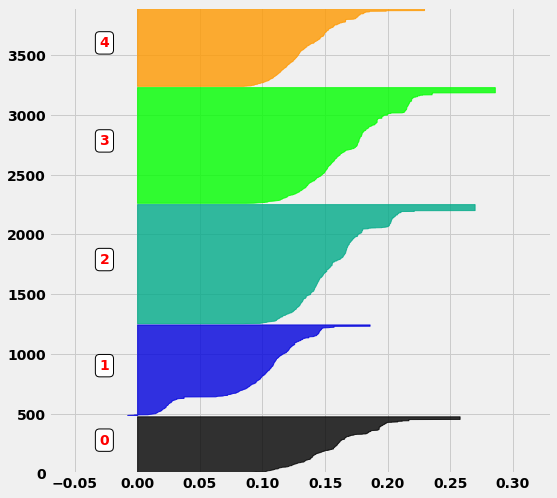

In [29]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

## Grouping products

created **categ_N** variables (with $ N \in [0: 4]$) that contains the amount spent in each product category:

In [39]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]
#___________________________________________
# sum of purchases / user & order
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['Revenue'].sum()
basket_price = temp.rename(columns = {'Revenue':'Basket Price'})
#____________________________________________________________
# percentage of the price of the order / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 
#_____________________
# date of the order
df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#______________________________________
# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]



,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
1,12747.0,537215,358.56,232.50,0.00,80.16,0.0,45.90,2010-12-05 15:38:00
10,12747.0,577104,312.73,166.25,15.00,19.80,0.0,111.68,2011-11-17 17:13:00
9,12747.0,569397,675.38,308.10,0.00,54.08,0.0,313.20,2011-10-04 08:26:00
8,12747.0,563949,301.70,231.50,15.00,19.80,0.0,35.40,2011-08-22 10:38:00
7,12747.0,558265,376.30,205.35,27.75,0.00,0.0,143.20,2011-06-28 10:06:00


## 2. RFM Score Calculation:

In [96]:
#________________________________________________________________
# Calculating the Frequency(count) and Monetary(sum)
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

# calculating the Recency(last purchase date) & the First_date of purchase
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'Recency'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'First Purchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

# renaming the columns
selected_customers = transactions_per_user.rename(index=str, columns={"count": "Frequency", "sum": "Monetary"})     
selected_customers = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase','categ_0', 'categ_1','categ_2','categ_3','categ_4']]

rfm_data = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase']]
product_data = selected_customers[['CustomerID', 'Monetary','categ_0', 'categ_1','categ_2','categ_3','categ_4']]
product_data.head()

,CustomerID,Monetary,categ_0,categ_1,categ_2,categ_3,categ_4
0,12747.0,4196.01,52.018465,4.004995,14.110548,0.972352,28.893639
1,12748.0,31355.11,15.516163,24.834836,24.722892,17.251351,17.674759
2,12749.0,3868.20,24.625149,37.602761,21.328266,4.429967,12.013857
3,12820.0,942.34,0.000000,20.894794,29.607148,20.913895,28.584163
4,12821.0,92.72,18.334771,0.000000,21.354616,38.826575,21.484038


# Modelling

## K-means Clustering:

- Why k-means?
- As our feature variables are numerical and our goal is unsupervised to find out some sort of structure/grouping in    the customers, I used k-means clustering.

# Feature selection:
- I am applying k-means clustering
* 1st using **Recency,Frequency, Monetary  **
  - Recency
  - Frequency
  - Monetary
* 2nd **using the product categories**
  - Categ_0
  - Categ_1
  - Categ_2
  - Categ_3
  - Categ_4
    

In [43]:
# selecting features for clustering using RFM 
rfm_clustering = selected_customers[['Recency','Frequency', 'Monetary']]

# selecting features for clustering based on previous purchased products
product_clustering = selected_customers[['categ_0','categ_1', 'categ_2','categ_3','categ_4']]

In [81]:
display(rfm_clustering.describe())

recency = go.Box(
    y= rfm_clustering.Recency,
    name = 'Recency'
    
)
frequency = go.Box(
    y=rfm_clustering.Frequency,
    name = 'Frequency'
    
)
monetary = go.Box(
    y=rfm_clustering.Monetary,
    name = 'Monetary'
)
data =[recency, frequency, monetary]

iplot(data)



,Recency,Frequency,Monetary
count,3912.000000,3912.000000,3912.000000
mean,91.876534,4.227505,1747.337910
std,99.695909,7.134453,6730.162064
min,0.000000,1.000000,2.900000
25%,17.000000,1.000000,292.007500
50%,50.000000,2.000000,635.070000
75%,143.000000,5.000000,1536.315000
max,373.000000,205.000000,259657.300000


### Square Root Transformation:
The RFM feature selected for our analysis has different scales:
- Recency : 0 - 373
- Frequency : 1 - 205
- Monetary : 2.9 : 259,657

Since, we are using k-means clustering which basically finds the eucledian distance between the data points and the cluster mean, its import to scale or transform  the data before analysis 
I am using square root transformation to transform my data before loading it into k-means clustering model

In [56]:
# Squre Root Transformation
df_sqrt = rfm_clustering
sqrt_df = df_sqrt.apply(np.sqrt)

In [57]:
matrix = sqrt_df.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [ 8.15011469  1.79362304 32.07254545]


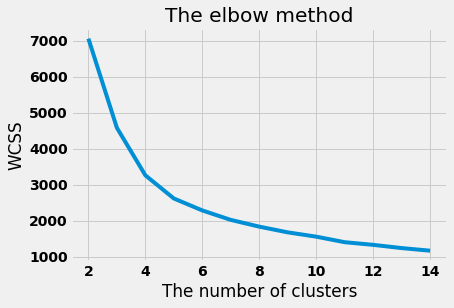

In [58]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [59]:

for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.6005040987032123
For n_clusters = 4 The average silhouette_score is : 0.5297904992840151
For n_clusters = 5 The average silhouette_score is : 0.523596172966738
For n_clusters = 6 The average silhouette_score is : 0.45166919105390346
For n_clusters = 7 The average silhouette_score is : 0.4164862040731145
For n_clusters = 8 The average silhouette_score is : 0.3967995933097067
For n_clusters = 9 The average silhouette_score is : 0.4064028398846738


In [60]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.403


In [61]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

,4,1,0,3,2
nb. of customers,1499,1101,1001,281,30


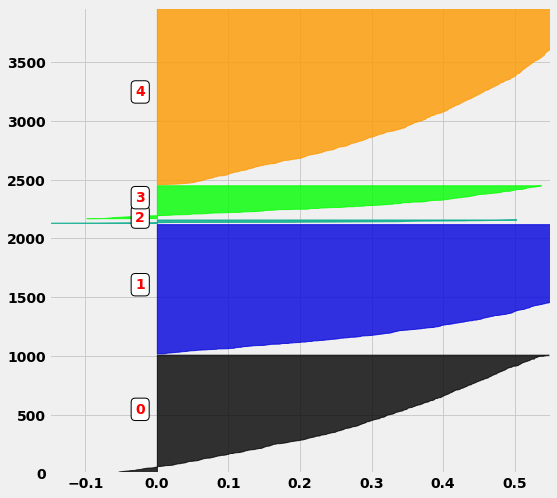

In [64]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [ ]:
rfm_data.loc[:, 'cluster'] = clusters_clients
rfm_data.head()
# pd.DataFrame.to_csv(selected_customers,'/Users/deepanshparab/Desktop/OnlineRetail/data/after_cluster.csv')

In [76]:
# plotting cluster recency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Recency,
    name = 'cluster0_Recency'
)

trace1 = go.Box(
    y=cls1.Recency,
    name = 'cluster1_Recency'
)
trace2 = go.Box(
    y=cls2.Recency,
    name = 'cluster2_Recency'
)
trace3 = go.Box(
    y=cls3.Recency,
    name = 'cluster3_Recency'
)
trace4 = go.Box(
    y=cls4.Recency,
    name = 'cluster4_Recency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)



In [82]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Frequency,
    name = 'cluster0_Frequency'
)

trace1 = go.Box(
    y=cls1.Frequency,
    name = 'cluster1_Frequency'
)
trace2 = go.Box(
    y=cls2.Frequency,
    name = 'cluster2_Frequency'
)
trace3 = go.Box(
    y=cls3.Frequency,
    name = 'cluster3_Frequency'
)
trace4 = go.Box(
    y=cls4.Frequency,
    name = 'cluster4_Frequency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [77]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Monetary,
    name = 'cluster0_Monetary'
)

trace1 = go.Box(
    y=cls1.Monetary,
    name = 'cluster1_Monetary'
)
trace2 = go.Box(
    y=cls2.Monetary,
    name = 'cluster2_Monetary'
)
trace3 = go.Box(
    y=cls3.Monetary,
    name = 'cluster3_Monetary'
)
trace4 = go.Box(
    y=cls4.Monetary,
    name = 'cluster4_Monetary'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [78]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(rfm_data[rfm_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = rfm_data[rfm_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________

print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 3912


,CustomerID,Recency,Frequency,Monetary,First Purchase,size
cluster,,,,,,
1.0,15593.872843,231.806540,1.544959,422.360092,262.998183,1101
4.0,15594.432288,46.038025,1.893929,526.933918,137.575717,1499
0.0,15482.169830,30.181818,5.768232,1996.501329,271.465534,1001
3.0,15583.569395,17.113879,16.483986,6915.607117,337.313167,281
2.0,15306.666667,5.666667,53.066667,54630.335667,353.766667,30


In [79]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


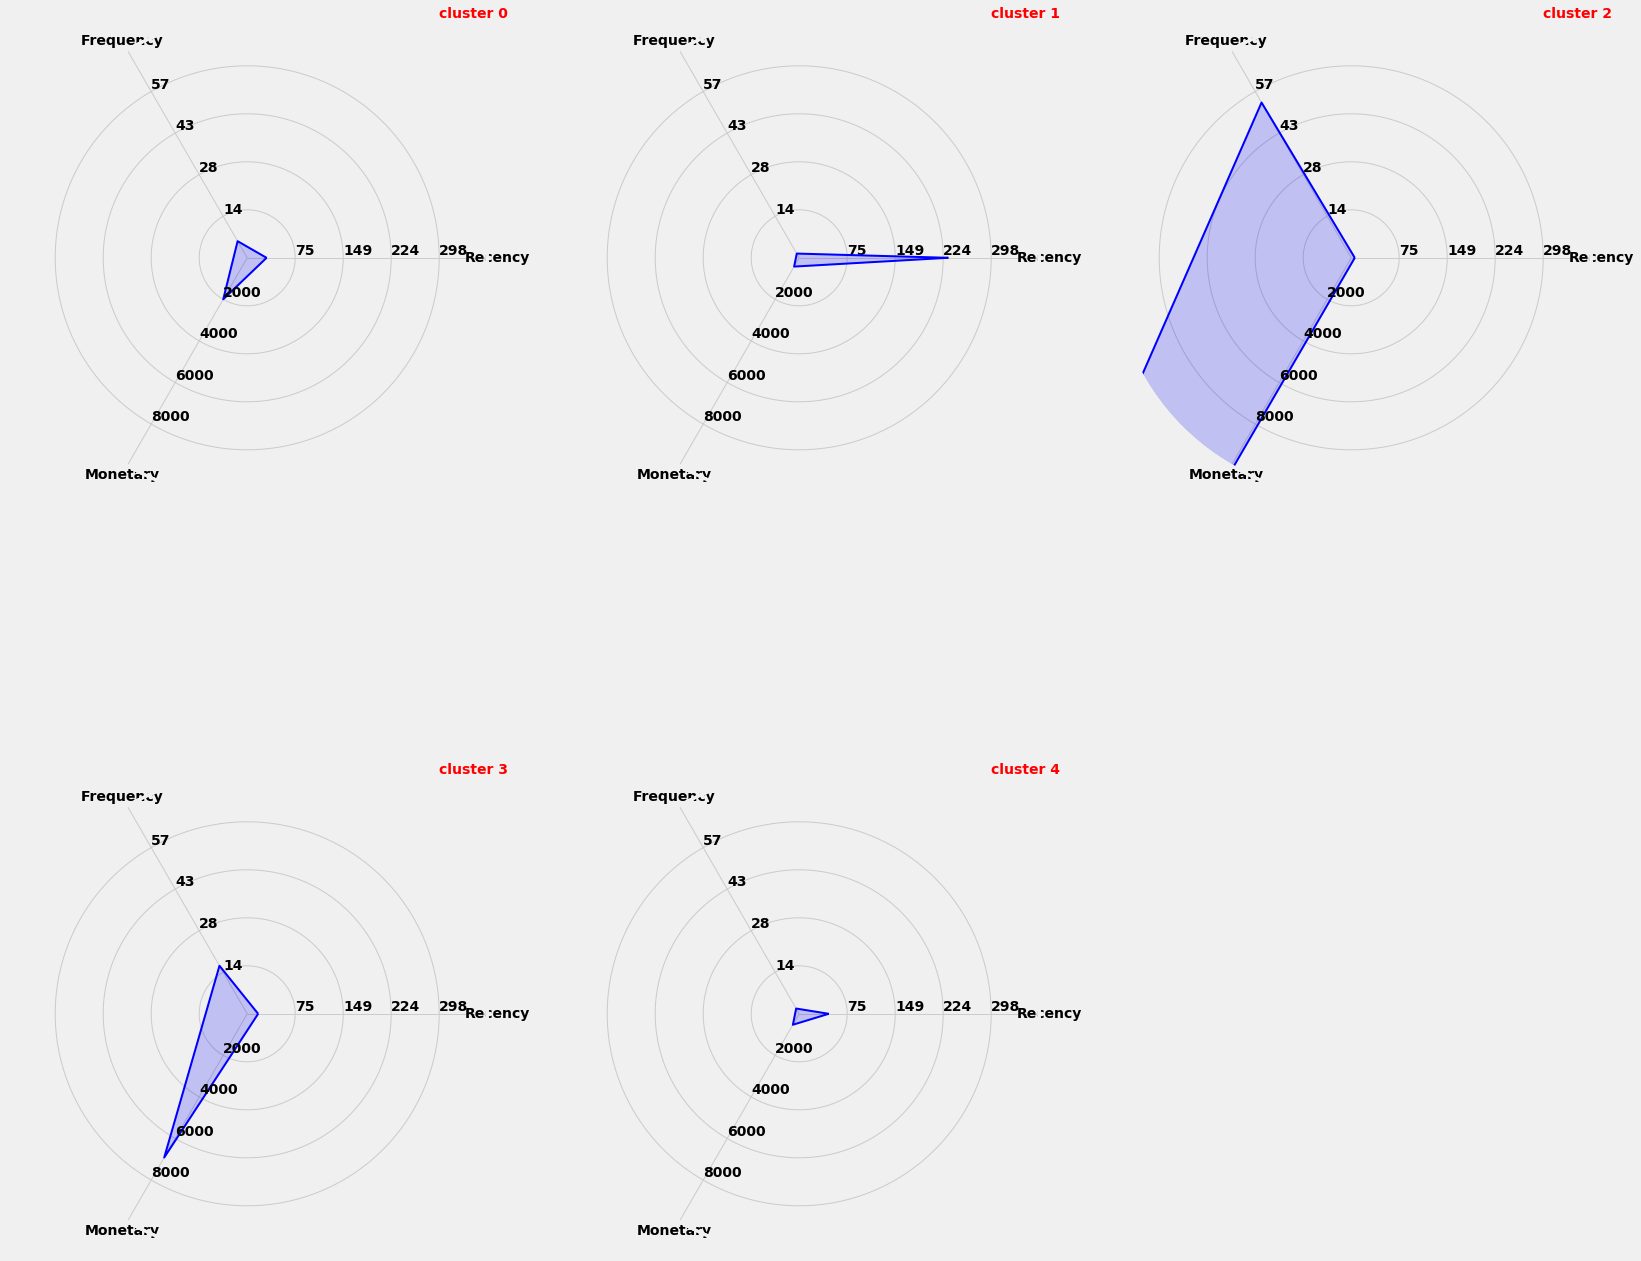

In [80]:
fig = plt.figure(figsize=(20,10))

attributes = ['Recency','Frequency', 'Monetary']
ranges = [[0.1, 373], [0.1, 71], [0.01, 10000]]
index  = [0, 1, 2, 3, 4]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1 

In [98]:
matrix = product_clustering.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)



variables mean values: 
------------------------------------------------------------------------------------------
 [15.76495856 22.96826993 25.1736407  14.27138396 21.82878961]


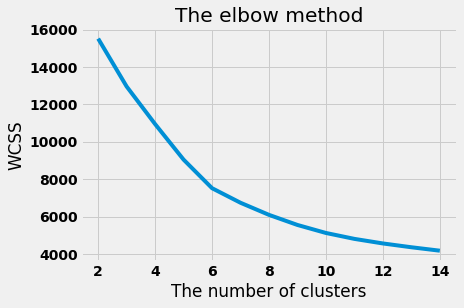

In [99]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [100]:
n_clusters = 6
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.277


In [101]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

,5,3,1,4,0,2
nb. of customers,1882,576,451,383,323,297


In [102]:
product_data.loc[:, 'cluster'] = clusters_clients

In [103]:
product_data.head(10)

,CustomerID,Monetary,categ_0,categ_1,categ_2,categ_3,categ_4,cluster
0,12747.0,4196.01,52.018465,4.004995,14.110548,0.972352,28.893639,4
1,12748.0,31355.11,15.516163,24.834836,24.722892,17.251351,17.674759,5
2,12749.0,3868.20,24.625149,37.602761,21.328266,4.429967,12.013857,5
3,12820.0,942.34,0.000000,20.894794,29.607148,20.913895,28.584163,5
4,12821.0,92.72,18.334771,0.000000,21.354616,38.826575,21.484038,2
5,12822.0,918.98,6.518096,12.143899,15.843653,15.421446,50.072907,0
6,12823.0,1759.50,100.000000,0.000000,0.000000,0.000000,0.000000,4
7,12824.0,397.12,20.321313,13.421636,16.317486,23.559629,26.379936,5
8,12826.0,1468.12,1.532572,7.901261,35.998420,13.515244,41.052503,5
9,12827.0,430.15,41.427409,19.748925,30.593979,8.229687,0.000000,4


In [104]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(product_data[product_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = product_data[product_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 3912


,Monetary,categ_0,categ_1,categ_2,categ_3,categ_4,size
cluster,,,,,,,
2.0,740.521279,6.185162,8.028510,19.124808,54.485001,12.176519,297
3.0,1057.384203,6.229217,10.686778,54.608761,13.860865,14.617590,576
1.0,1113.633370,12.320237,59.731109,11.188104,5.009677,11.768375,451
0.0,1924.048390,6.153872,10.104399,14.349232,7.025059,62.367438,323
4.0,1977.558253,51.284830,19.225287,11.754328,5.448736,12.301553,383
5.0,2192.070506,15.441699,23.244465,25.059524,13.309472,22.951303,1882


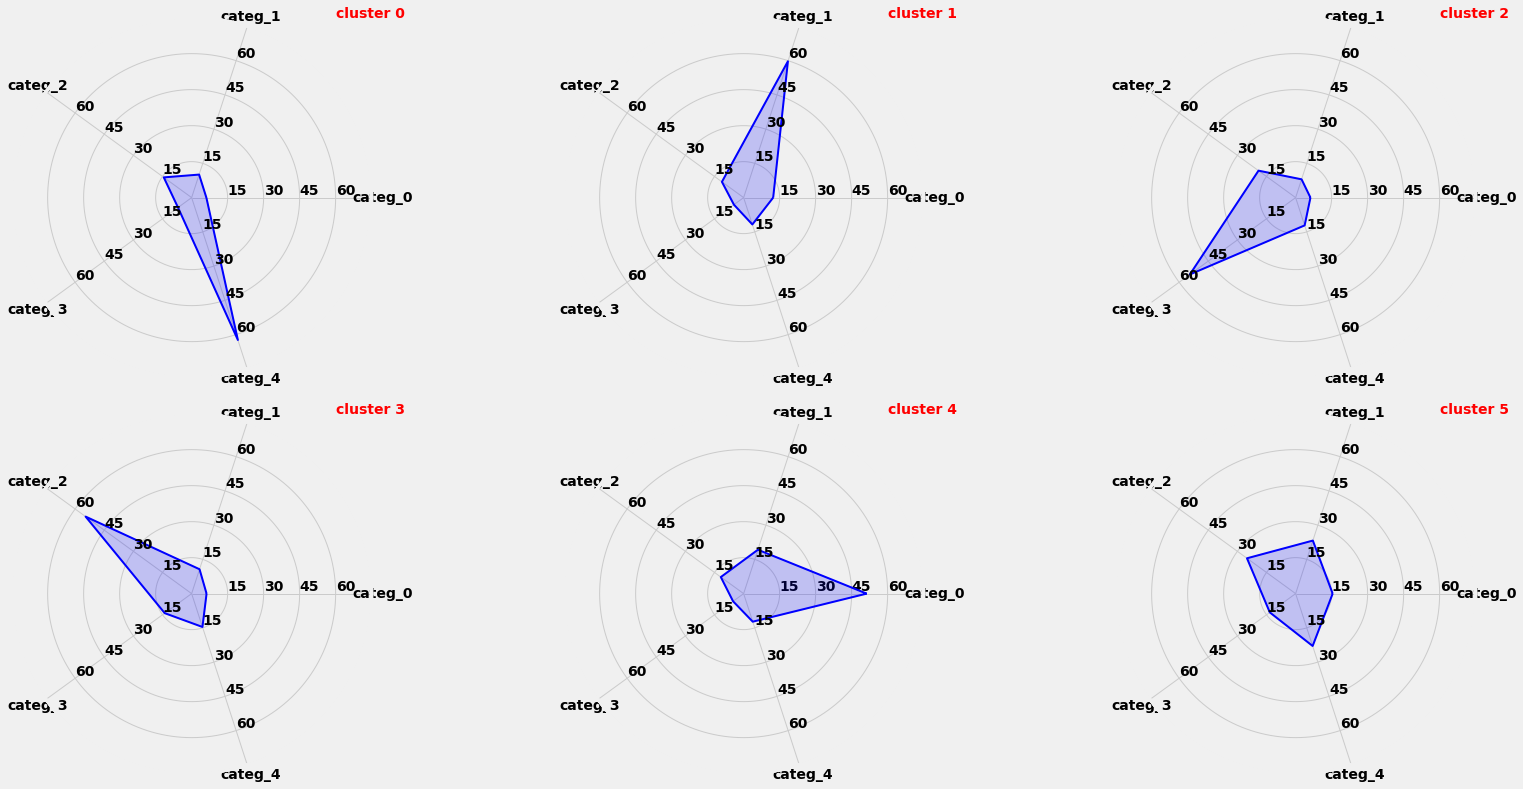

In [105]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

fig = plt.figure(figsize=(20,10))

attributes = ['categ_0','categ_1', 'categ_2','categ_3','categ_4']
ranges = [[0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1 

# Cluster Analysis:
- Cluster0: 
  - Good Monetary score 
  - Have high tendency of purchashing products from category_4 
 
- Cluster1:
  - Average Monetary score
  - Have high tendency of purchasing products from category_1
  
- Cluster2:
  - Below Average Monetary score
  - Have high tendency of puchasing products from category_3

- Cluster3:
  - Average Monetary score
  - Have high tendency of purchasing products from category_2
  
- Cluster4:
  - Good Monetary score
  - Have high tendency of purchasing products from category_0

- Cluster5:
  - Highest Monetary scores
  - Are general buyer,can be targeted for multiple products 